<a href="https://colab.research.google.com/github/Kiko-exe/Environmental-physics/blob/main/Oceans_Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install argopy # this installs the argo package for python
!pip install basemap # this install the basemap mapping toolbox

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.2/175.2 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.7/860.7 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.7 MB/s eta 0:00:00


In [ ]:
from matplotlib import pyplot as plt
from matplotlib import rc
from mpl_toolkits.basemap import Basemap
import numpy as np
from matplotlib import rc
import argopy
from argopy import DataFetcher as ArgoDataFetcher
rc('font', **{'size' : 18})

In [ ]:
# Here we're going to download and examine an ARGO float in python
# Lets look at ARGO data belonging to some float
ds = ArgoDataFetcher().float(4903241).to_xarray()
ds = ds.argo.point2profile()
print(ds)

<xarray.Dataset>
Dimensions:                (N_PROF: 14, N_LEVELS: 1150)
Coordinates:
  * N_PROF                 (N_PROF) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13
  * N_LEVELS               (N_LEVELS) int64 0 1 2 3 4 ... 1146 1147 1148 1149
    LATITUDE               (N_PROF) float64 74.29 74.32 74.36 ... 74.96 74.9
    LONGITUDE              (N_PROF) float64 -148.2 -148.3 ... -153.1 -153.4
    TIME                   (N_PROF) datetime64[ns] 2019-09-28T15:51:57 ... 20...
Data variables: (12/13)
    CONFIG_MISSION_NUMBER  (N_PROF) int32 1 2 2 2 3 3 4 4 4 4 4 4 4 4
    CYCLE_NUMBER           (N_PROF) int32 0 2 3 4 5 6 7 8 9 10 11 12 13 14
    DATA_MODE              (N_PROF) <U1 'R' 'R' 'R' 'R' 'R' ... 'R' 'R' 'R' 'R'
    DIRECTION              (N_PROF) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER        (N_PROF) int32 4903241 4903241 ... 4903241 4903241
    POSITION_QC            (N_PROF) int32 1 1 1 1 1 1 1 1 1 1 1 1 1 1
    ...                     ...
    PRES_QC        

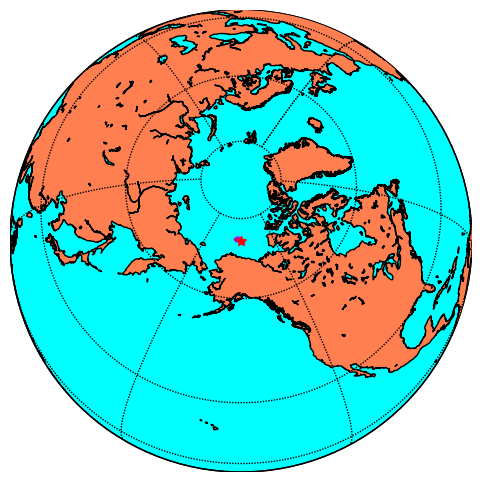

In [ ]:
# Here we will plot the location of a specific section
cycleno = 4 # which dive we want to look at
plt.figure(figsize=(12,6))

map = Basemap(projection='ortho',
              lat_0=ds.LATITUDE[cycleno], lon_0=ds.LONGITUDE[cycleno],resolution='l')

map.drawparallels(np.arange(-90.,120.,30.))
map.drawmeridians(np.arange(0.,420.,60.))
#Fill the globe with a blue color
map.drawmapboundary(fill_color='aqua')
#Fill the continents with the land color
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()



x, y = map(ds.LONGITUDE, ds.LATITUDE)


map.scatter(x,y,s=5, marker='D',color='m')
map.scatter(x[cycleno],y[cycleno],s=50, marker='*',color='r')

plt.show()


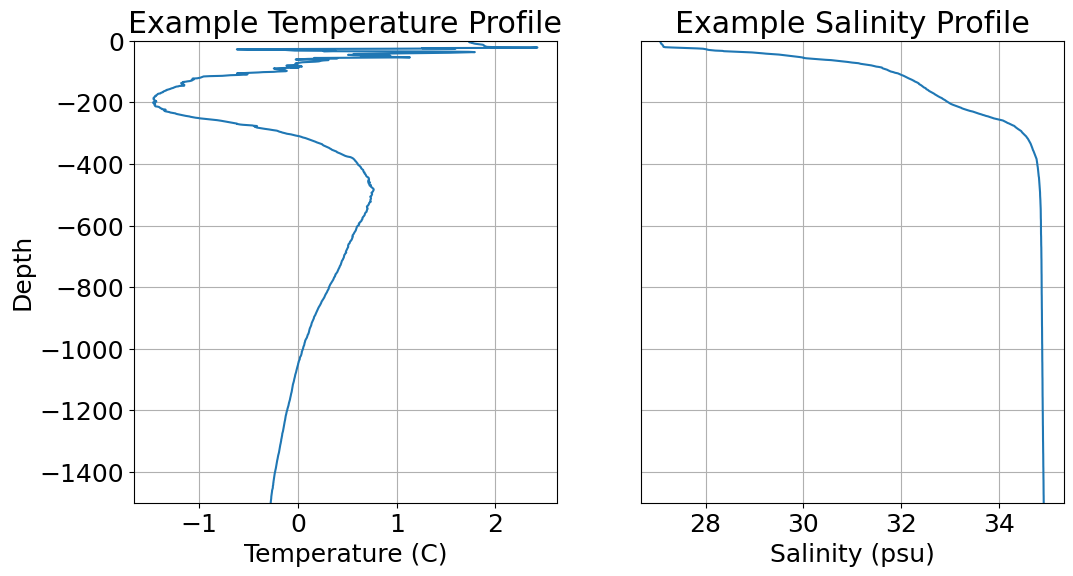

In [ ]:
# here plot a section of temperature versus pressue (in decibar, which is approximately meters).
# We can convert pressure to depth by multiplying by -1

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(ds.TEMP[cycleno,:],-1*ds.PRES[cycleno,:])
plt.xlabel('Temperature (C)')
plt.ylabel('Depth')
plt.title('Example Temperature Profile')
plt.ylim([-1500,0])
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(ds.PSAL[cycleno,:],-1*ds.PRES[cycleno,:])
plt.xlabel('Salinity (psu)')
plt.ylabel('')
plt.tick_params(left=False,labelleft = False)
plt.title('Example Salinity Profile')
plt.ylim([-1500,0])
plt.grid(True)

